In [2]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
RESULTS_PATH = "../results/"
DATA_PATH = "../data/"

# Acuracies

In [4]:
#proportions = ['1', '10% (5 +- 18)', '20% (9 +- 35)', '30% (13 +- 53)', '40% (17 +- 71)', '50% (22 +- 88)', '60% (26 +- 106)', '70% (31 +- 124)', '80% (35 +- 142)', '90% (39 +- 159)']
proportions = ['Single', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
x_pos = np.arange(len(proportions))
accuracies = [0.564081, 0.576847, 0.627047, 0.655225, 0.680070, 0.694426, 0.700279, 0.733205, 0.749864]
errors = [0.005573, 0.005291, 0.005273, 0.005459, 0.006041, 0.006256, 0.007022, 0.009671, 0.015235]

In [5]:
def autolabel(ax, rects,data):
    """
    Attach a text label above each bar displaying its height
    """
    for rect, text in zip(rects,data):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height/2, text,ha='center', va='center', fontsize=10)

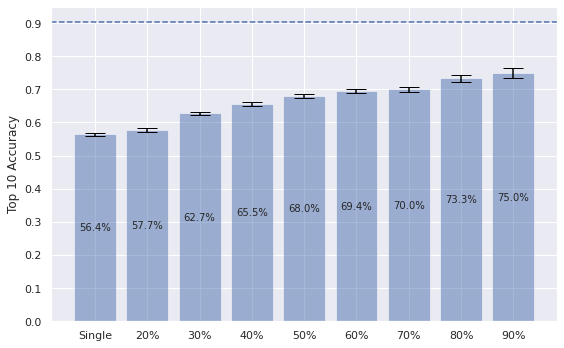

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x_pos, accuracies, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.axhline(y=0.904, linestyle='--')
ax.set_ylabel('Top 10 Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(proportions)
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
ax.yaxis.grid(True)

autolabel(ax, rects1, ["%.1f%%" % (acc * 100) for acc in accuracies])

# Save the figure and show
fig.tight_layout()
fig.savefig(f'{RESULTS_PATH}few_shot_for_unknown_labs__accuracies.pdf', format='pdf')
fig.show()

# Positions

In [1]:
import json

In [9]:
with open("../data/one_shot_positions_for_unknown.json", "r") as f:
    positions = json.load(f)

In [14]:
positions_arr = np.array(positions).flatten()

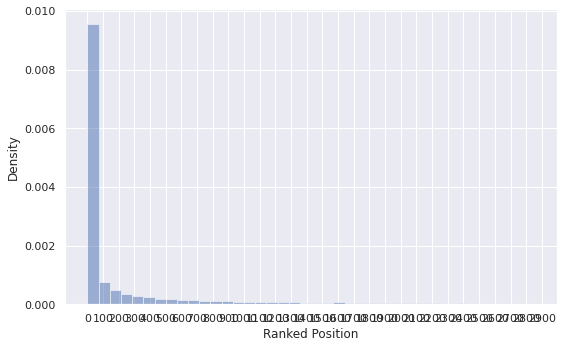

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(positions_arr+1, density=True, alpha=0.5, bins=40)
ax.set_ylabel('Density')
ax.set_xlabel('Ranked Position')
ax.set_xticks(np.arange(0, 3000, 100))
#ax.set_xticklabels(proportions)
#ax.set_yticks(np.arange(0.0, 1.0, 0.1))
ax.yaxis.grid(True)

# Save the figure and show
fig.tight_layout()
fig.savefig(f'{RESULTS_PATH}one_shot_positions_for_unknown_labs_histogram.pdf', format='pdf')
fig.show()

In [22]:
(positions_arr+1).mean()

231.4139735496777

In [23]:
np.median(positions_arr+1)

4.0

In [24]:
(positions_arr < 100).sum() / len(positions_arr)

0.7068475216714826

In [25]:
np.quantile(positions_arr+1, 0.9, interpolation="lower")

829

In [14]:
train_labels_df["output"].nunique()

1314

In [26]:
positions_arr.mean()

230.4139735496777

In [27]:
np.median(positions_arr)

3.0